<img src = "https://www.bits-pilani.ac.in/Uploads/Campus/BITS_university_logo.gif">

<h1><center>Work Integrated Learning Programmes Division<br>
M.Tech (Data Science and Engineering)<br> Data Visualization And Interpretation (DSECL ZG555))<br>
Second Semester, 2020-21
</center></h1>

<h2><center>Assignment 2 – PS1 [Weightage 13%]</center></h2>

<ol>
  <li>Do not change the name of the data file that is shared with the problem statement.</li>
  <li>If intermediate data files are created, retain in the present working directory and attach them during submission.</li>
  <li>Retain the data file in the same directory as that of this workbook.</li>
  <li>Retain the Visualizations that is produced in the file. Don't clear them away.</li>
  <li>Submit only the .IPYNB file. Intermediate files to be attached as mentioned in (2).</li>
  <li>All the visuals should adhere to the visualization principles learnt in the Course and must be presentation ready. Most effective visuals would fetch maximum  credits</li>
  <li>Submissions done via means other than CANAVAS will strictly be NOT graded.</li>
</ol>

<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {
  background-color: #dddddd;
}
</style>

<h2>Group No: 36 </h2>

<table>
  <tr>
    <th>Full Name</th>
    <th>BITS ID</th>
  </tr>
  <tr>
    <td>Abhijith K S</td>
    <td>2020FC04193</td>
  </tr>
  <tr>
    <td>Keesari Shravya</td>
    <td>2020FC04582</td>
  </tr>
  <tr>
    <td>Manepalli Shravani</td>
    <td>2020FC04587</td>
  </tr>
</table>

<h3>Objective</h3>
<h4>To find best players from each positions with their age, nationality, club based on their Potential Scores</h4>




##  Download and Prep the Data: 1 Marks

<h4>Import the libraries needed</h4>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<h4> Load data and store in dataframe </h4>

In [2]:
ps1_data=pd.read_csv("./dvi-a2-ps1-data.csv")
ps1_data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


<h3>Objective</h3>
<h4>To find best players from each positions with their age, nationality, club based on their Potential Scores</h4>




In [3]:
ps1_data.iloc[ps1_data.groupby(ps1_data['Position'])['Potential'].idxmax()][['Position', 'Name', 'Age', 'Club', 'Nationality', 'Potential'
]].sort_values("Potential").style.background_gradient('Reds')

,Position,Name,Age,Club,Nationality,Potential
601,LWB,Jonny,24,Wolverhampton Wanderers,Spain,83
766,RWB,Pablo Maffeo,20,VfB Stuttgart,Spain,86
171,RAM,H. Ziyech,25,Ajax,Morocco,86
350,CF,A. Milik,24,Napoli,Poland,88
35,LB,Marcelo,30,Real Madrid,Brazil,88
247,RB,João Cancelo,24,Juventus,Portugal,88
21,LS,E. Cavani,31,Paris Saint-Germain,Uruguay,89
28,LAM,J. Rodríguez,26,FC Bayern München,Colombia,89
27,CDM,Casemiro,26,Real Madrid,Brazil,90
78,CM,S. Milinković-Savić,23,Lazio,Serbia,90


* We have grouped the data at Position level and identified the best player from each position who is having maximum Potential and identified Name, Age, Club and Nationality of the player.
* From this we have observed that the maximum available Potential values is 95 and least is 83.
* K. Mbappé is the youngest player among them and Cristiano Ronaldo being the eldest.

<h4>Find out  what type of variable you are dealing with. This will help you find the right visualization method for that variable.</p>


In [4]:
ps1_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16684 entries, 0 to 16683
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                16684 non-null  int64  
 1   ID                        16684 non-null  int64  
 2   Name                      16684 non-null  object 
 3   Age                       16684 non-null  int64  
 4   Photo                     16684 non-null  object 
 5   Nationality               16684 non-null  object 
 6   Flag                      16684 non-null  object 
 7   Overall                   16684 non-null  int64  
 8   Potential                 16684 non-null  int64  
 9   Club                      16455 non-null  object 
 10  Club Logo                 16684 non-null  object 
 11  Value                     16684 non-null  object 
 12  Wage                      16684 non-null  object 
 13  Special                   16684 non-null  int64  
 14  Prefer

# Visualisation Questions - 2 X 5 = 10 Marks

### Question 1
<h4>a. Fill the missing value for the continous variables with Mean(average) for proper data visualization
<br><br>
    b. Preprocess height - convert data in  format xx'xx to xx.xx Remove "nan" with Mode and convert the column to numerical
<br><br>    
    c. Preprocess weight - convert data in  format xxlbs to xx Remove "nan" with Mode and convert the column to numerical
<h4>d. Do Univariate anlaysis for outliers detection for height and weight
<br><br>
<h4>Write the python code in the below cell to create appropriate visual to perform the above task.
<h4> Answer in markdown cells below the visual
<br><br>
<ol>
    <li>Summarise your findings from the visual</li>
    <li>The reason for selecting the chart type you did</li>
    <li>Mention the pre-attentive attributes used.(atleast 2)</li>
    <li>Mention the gestalt principles used.(atleast 2)</li>
</ol>

**a. To fill in the missing value for the continous variables with Mean(average) for proper data visualization**

Note: Filling of missing values of continuous variables is shown after part (c) of the question as some of the columns of object type have numerical values enclosed as strings 

**Preprocesssing**

In [5]:
# Separate Numerical and Categorical Variables

numeric_col=[]
cat_col=[]
for col in ps1_data.columns:
    if ps1_data["{}".format(col)].dtype in ["float64","int64"]:
        numeric_col.append(col)
    else:
        cat_col.append(col)
print("Number of Numeric columns : {}".format(len(numeric_col)))
print("Number of Categorical columns : {}".format(len(cat_col)))
print("Total number of columns : {}".format(len(numeric_col)+len(cat_col)))

Number of Numeric columns : 44
Number of Categorical columns : 45
Total number of columns : 89


In [6]:
# Numerical column : Count of Numeric values
print("Numeric Columns: Number of unique values")
for col in numeric_col:
    print(col," : ",ps1_data["{}".format(col)].nunique())
    # Count of unique values less than 10 indicates it may be a categorical column
    if ps1_data["{}".format(col)].nunique() <10: 
        print("Unique values "," : ",ps1_data["{}".format(col)].unique())

Numeric Columns: Number of unique values
Unnamed: 0  :  16684
ID  :  16684
Age  :  28
Overall  :  38
Potential  :  40
Special  :  1357
International Reputation  :  5
Unique values   :  [ 5.  4.  3.  2.  1. nan]
Weak Foot  :  5
Unique values   :  [ 4.  5.  3.  2.  1. nan]
Skill Moves  :  5
Unique values   :  [ 4.  5.  1.  3.  2. nan]
Jersey Number  :  99
Crossing  :  89
Finishing  :  93
HeadingAccuracy  :  91
ShortPassing  :  85
Volleys  :  87
Dribbling  :  94
Curve  :  89
FKAccuracy  :  90
LongPassing  :  84
BallControl  :  90
Acceleration  :  86
SprintSpeed  :  84
Agility  :  80
Reactions  :  65
Balance  :  81
ShotPower  :  92
Jumping  :  72
Stamina  :  85
Strength  :  74
LongShots  :  92
Aggression  :  85
Interceptions  :  87
Positioning  :  94
Vision  :  85
Penalties  :  87
Composure  :  84
Marking  :  92
StandingTackle  :  90
SlidingTackle  :  88
GKDiving  :  66
GKHandling  :  67
GKKicking  :  78
GKPositioning  :  71
GKReflexes  :  69


In [7]:
# Categorical column : Count of unique values and unique values
print("Categorical Columns: Number of unique values")
for col in cat_col:
  print(col," : ",ps1_data["{}".format(col)].nunique())
  print("Unique values "," : ",ps1_data["{}".format(col)].sample(5).unique())

Categorical Columns: Number of unique values
Name  :  15799
Unique values   :  ['G. Pereiro' 'M. Besler' 'S. Pinas' 'A. Ceesay' 'A. Absalem']
Photo  :  16684
Unique values   :  ['https://cdn.sofifa.org/players/4/19/163631.png'
 'https://cdn.sofifa.org/players/4/19/224582.png'
 'https://cdn.sofifa.org/players/4/19/246037.png'
 'https://cdn.sofifa.org/players/4/19/211840.png'
 'https://cdn.sofifa.org/players/4/19/181457.png']
Nationality  :  162
Unique values   :  ['Spain' 'France' 'United States' 'Germany' 'Argentina']
Flag  :  162
Unique values   :  ['https://cdn.sofifa.org/flags/54.png'
 'https://cdn.sofifa.org/flags/21.png'
 'https://cdn.sofifa.org/flags/35.png'
 'https://cdn.sofifa.org/flags/103.png']
Club  :  651
Unique values   :  ['Minnesota United FC' 'FC Bayern München' 'Junior FC' 'Lecce'
 'Zagłębie Lubin']
Club Logo  :  678
Unique values   :  ['https://cdn.sofifa.org/teams/2/light/110770.png'
 'https://cdn.sofifa.org/teams/2/light/172.png'
 'https://cdn.sofifa.org/teams/2/lig

In [8]:
# Count of null values of all categorical columns
print("Categorical columns   Number of null values")
ps1_data[cat_col].isnull().sum()

Categorical columns   Number of null values


Name                        0
Photo                       0
Nationality                 0
Flag                        0
Club                      229
Club Logo                   0
Value                       0
Wage                        0
Preferred Foot             48
Work Rate                  48
Body Type                  48
Real Face                  48
Position                   55
Joined                   1502
Loaned From             15459
Contract Valid Until      277
Height                     48
Weight                     48
LS                       1763
ST                       1763
RS                       1763
LW                       1763
LF                       1763
CF                       1763
RF                       1763
RW                       1763
LAM                      1763
CAM                      1763
RAM                      1763
LM                       1763
LCM                      1763
CM                       1763
RCM                      1763
RM        

In [9]:
# Count of null values of all numerical columns
print("Numerical columns   Number of null values")
ps1_data[numeric_col].isnull().sum()

Numerical columns   Number of null values


Unnamed: 0                   0
ID                           0
Age                          0
Overall                      0
Potential                    0
Special                      0
International Reputation    48
Weak Foot                   48
Skill Moves                 48
Jersey Number               55
Crossing                    48
Finishing                   48
HeadingAccuracy             48
ShortPassing                48
Volleys                     48
Dribbling                   48
Curve                       48
FKAccuracy                  48
LongPassing                 48
BallControl                 48
Acceleration                48
SprintSpeed                 48
Agility                     48
Reactions                   48
Balance                     49
ShotPower                   49
Jumping                     49
Stamina                     49
Strength                    49
LongShots                   49
Aggression                  49
Interceptions               49
Position

In [10]:
ps1_data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Converting available numerical values in categorical columns to numeric columns

In [11]:
# Creating a custom function to convert units into numbers

def remove_custom(col_data):
  mult_fact=[]
  for val in col_data:
      if val[-1]=="K":
          mult_fact.append(float(val[0:-1])*1000)
      elif val[-1]=="M":
          mult_fact.append(float(val[0:-1])*1000000)
      elif val.isdigit():
          mult_fact.append(float(val))
      else:
          mult_fact.append("NaN")
  return mult_fact

In [12]:
ps1_data["Release Clause"].fillna("NaN", inplace=True)
print("Number of missing Values in Release Clause:{}".format(ps1_data["Release Clause"].isnull().sum()))
ps1_data["Release Clause"].isnull().sum()

Number of missing Values in Release Clause:0


0

In [13]:
# Replacing "€" with empty character in categorical columns

cat_num_col=[]
for col in cat_col:
  if str(ps1_data[col][0]).startswith("€"):
    print(col)
    cat_num_col.append(col)
    ps1_data[col] = ps1_data[col].str.replace("€","")
    ps1_data[col] = remove_custom(ps1_data[col])
    print(ps1_data[col][0])

Value
110500000.0
Wage
565000.0
Release Clause
226500000.0


In [14]:
ps1_data[cat_num_col].dtypes

Value             float64
Wage              float64
Release Clause     object
dtype: object

In [15]:
ps1_data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,110500000.0,565000.0,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,2.265e+08
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,77000000.0,405000.0,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,1.271e+08
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,118500000.0,290000.0,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,2.281e+08
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,72000000.0,260000.0,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,1.386e+08
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,102000000.0,355000.0,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,1.964e+08


In [16]:
# Converting column to float datatype for appending it to Numeric columns list
ps1_data["Release Clause"]=ps1_data["Release Clause"].astype("float64")

In [17]:
# Appending converted categorical columns to numerical columns list

numeric_col.extend(cat_num_col)
for col in cat_num_col:
  cat_col.remove(col)
print("Numeric Columns:{}".format(numeric_col))
print("Categorical Columns:{}".format(cat_col))

Numeric Columns:['Unnamed: 0', 'ID', 'Age', 'Overall', 'Potential', 'Special', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Jersey Number', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Value', 'Wage', 'Release Clause']
Categorical Columns:['Name', 'Photo', 'Nationality', 'Flag', 'Club', 'Club Logo', 'Preferred Foot', 'Work Rate', 'Body Type', 'Real Face', 'Position', 'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RW

**b. Preprocessing height - convert data in format xx'xx to xx.xx Remove "nan" with 
Mode and convert the column to numerical**

In [18]:
# Replacing Null values with Mode and converting Height in feet to centimeters

ps1_data['Height']=ps1_data['Height'].fillna(ps1_data['Height'].mode())
print("Before conversion")
print(ps1_data['Height'][0:5])

ps1_data[['feet','inches']] = ps1_data['Height'].str.split("'",expand=True)
ps1_data['feet'] = ps1_data['feet'].astype("float64")
ps1_data['inches'] = ps1_data['inches'].astype("float64")
ps1_data['Height'] = (2.54 * (12 * (ps1_data['feet']))) + (2.54 * ps1_data['inches'])

print("\nAfter conversion (in cm)")
print(ps1_data['Height'][0:5])

Before conversion
0     5'7
1     6'2
2     5'9
3     6'4
4    5'11
Name: Height, dtype: object

After conversion (in cm)
0    170.18
1    187.96
2    175.26
3    193.04
4    180.34
Name: Height, dtype: float64


**c. Preprocessing weight - convert data in format xxlbs to xx Remove "nan" with Mode and convert the column to numerical**

In [19]:
# Replacing Null values with Mode and converting Weight in lbs to Kg

ps1_data['Weight']=ps1_data['Weight'].fillna(ps1_data['Weight'].mode())
print("Before conversion")
print(ps1_data['Weight'][0:5])

ps1_data['Weight']=ps1_data.Weight.str.replace("lbs", "")
ps1_data['Weight'] = ps1_data['Weight'].astype("float64")
ps1_data['Weight'] = ps1_data['Weight']/2.2046

print("\nAfter conversion (in Kg)")
print(ps1_data['Weight'][0:5])

Before conversion
0    159lbs
1    183lbs
2    150lbs
3    168lbs
4    154lbs
Name: Weight, dtype: object

After conversion (in Kg)
0    72.121927
1    83.008255
2    68.039554
3    76.204300
4    69.853942
Name: Weight, dtype: float64


**a. (continued) Filling missing values for continuous variables with Mean(Average)**

In [20]:
ps1_data[numeric_col]=ps1_data[numeric_col].fillna(ps1_data[numeric_col].mean())
print("Columns          Number of null values")
ps1_data[numeric_col].isnull().sum()

Columns          Number of null values


Unnamed: 0                  0
ID                          0
Age                         0
Overall                     0
Potential                   0
Special                     0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Jersey Number               0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions                   0
Balance                     0
ShotPower                   0
Jumping                     0
Stamina                     0
Strength                    0
LongShots                   0
Aggression                  0
Interceptions               0
Positioning                 0
Vision    

**d. Univariate analysis for outliers detection for Height and Weight**

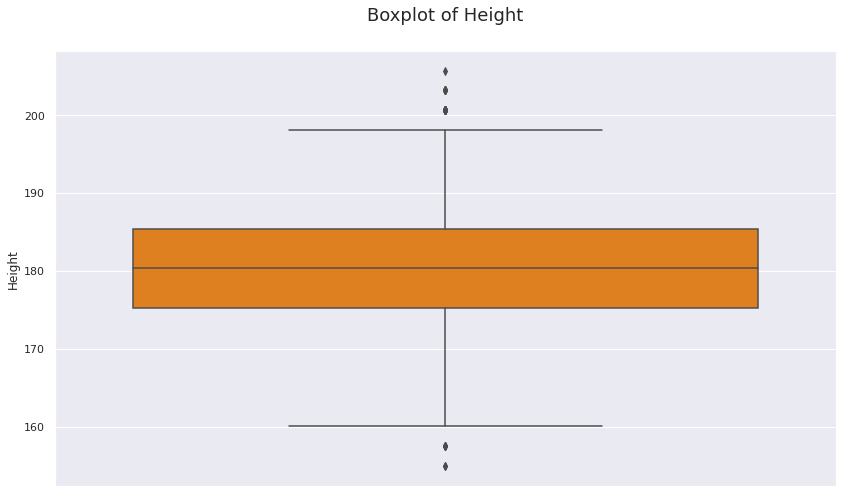

In [21]:
# Box plot for outlier analysis of Height

sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(14,8)})
sns.boxplot(y=ps1_data.Height,orient='v',whis=1.5,palette='autumn')
plt.title("Boxplot of Height", loc='center', size=18, pad=30)
plt.show()

In [22]:
ps1_data['Height'].describe()

count    16636.000000
mean       181.292576
std          6.737965
min        154.940000
25%        175.260000
50%        180.340000
75%        185.420000
max        205.740000
Name: Height, dtype: float64


**1.** **Summarise your findings from the visual**
   
   * Most of the players height range from 175cm to 185cm. 
   * Very few among the players fall in the range below the height 154cm who are under the avg. height and few above 205cm. 
   * Mean and Meadian of the heights of the players are almost same. 
   * From the above visualization it is easy to interpret that there are only five players as such who will be considered as outliers.

**2. The reason for selecting the chart type you did**

  * Box Plot gives the representation of statistical five number summary of a given data set.
  * We have used Box Plot as it provides a visual summary of the data to identify mean values, the dispersion of the data set, and signs of skewness.
  * As the purpose is to identify outliers, box plots is the right fit for visualization to give a better view of comparing the distributions.

**3. Mention the pre-attentive attributes used.(atleast 2)**
  
  * A dark orange colour is used to show the concentration of the data points between the Quartiles Q1 and Q3.
  * A diamond shape is used to represent only the outliers and not all the data points in the column.
  
**4. Mention the gestalt principles used.(atleast 2)**

  * Principle of Similarity

  All the outliers are represented by same shape, size and colour to denote them as a group of outliers.

  * Figure/Ground

  In this visualization, back ground is used as least aspect while the foreground the max with Orange colour.

  * Principle of Continuity

  Outliers are in a continuous line and compel the eye to move through one object and continue to another object.

  * Principle of Proximity

  When we have items next to each other, they are perceived as grouped/ similar/ together in case of outliers

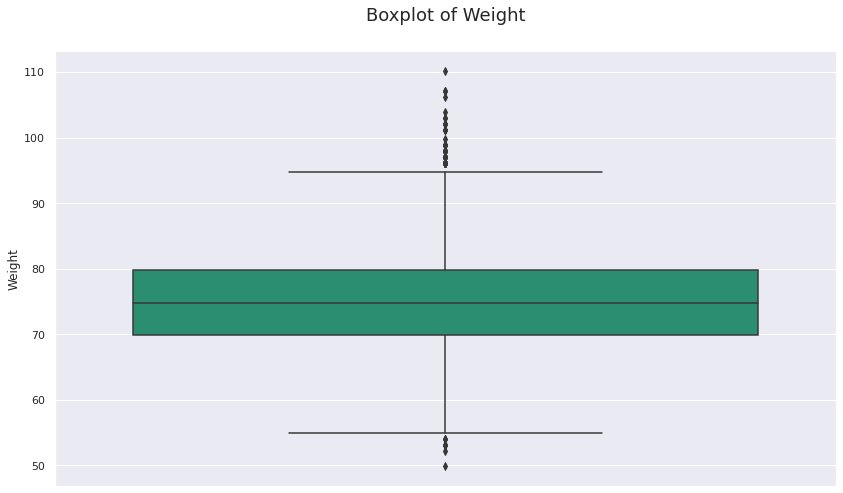

In [23]:
# Box plot for outlier analysis for Weight

sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(14,8)})
sns.boxplot(y=ps1_data.Weight,orient='v',whis=1.5,palette='Dark2',fliersize=5)
plt.title("Boxplot of Weight", loc='center', size=18, pad=30)
plt.show()

In [24]:
ps1_data['Weight'].describe()

count    16636.000000
mean        75.504846
std          7.057361
min         49.895673
25%         69.853942
50%         74.843509
75%         79.833076
max        110.224077
Name: Weight, dtype: float64


**1.** **Summarise your findings from the visual**
   
   * Most of the players weighed from 70 to 80 kgs. 
   * 4 of the players are underweight and 12 are overweight.
   * From the above visualization it is easy to interpret the players who are underweight and overweight as such who will be considered as outliers.

**2. The reason for selecting the chart type you did**

  * Box Plot gives the representation of statistical five number summary of a given data set.
  * We have used Box Plot as it provides a visual summary of the data to identify mean values, the dispersion of the data set, and signs of skewness.
  * As the purpose is to identify outliers, box plots is the right fit for visualization to give a better view of comparing the distributions.

**3. Mention the pre-attentive attributes used.(atleast 2)**
  
  * A dark green colour is used to show the concentration of the data points between the Quartiles Q1 and Q3.
  * A diamond shape is used to represent only the outliers and not all the data points in the column.
  
**4. Mention the gestalt principles used.(atleast 2)**

  * Principle of Similarity

  All the outliers are represented by same shape, size and colour to denote them as a group of outliers.

  * Figure/Ground

  In this visualization, back ground is used as least aspect while the foreground the max with Green colour.

  * Principle of Continuity

  Outliers are in a continuous line and compel the eye to move through one object and continue to another object.

  * Principle of Proximity

  When we have items next to each other, they are perceived as grouped/ similar/ together in case of outliers

### Question 2
<h4>Do Bi-Variate analysis for outliers detection for height and weight 
<br><br>
<h4>Write the python code in the below cell to create appropriate visual to perform the above task.
<h4> Answer in markdown cells below the visual
<br><br>
<ol>
    <li>Summarise your findings from the visual</li>
    <li>The reason for selecting the chart type you did</li>
    <li>Mention the pre-attentive attributes used.(atleast 2)</li>
    <li>Mention the gestalt principles used.(atleast 2)</li>
</ol>

**Bi-Variate analysis for outliers detection for Height and Weight**

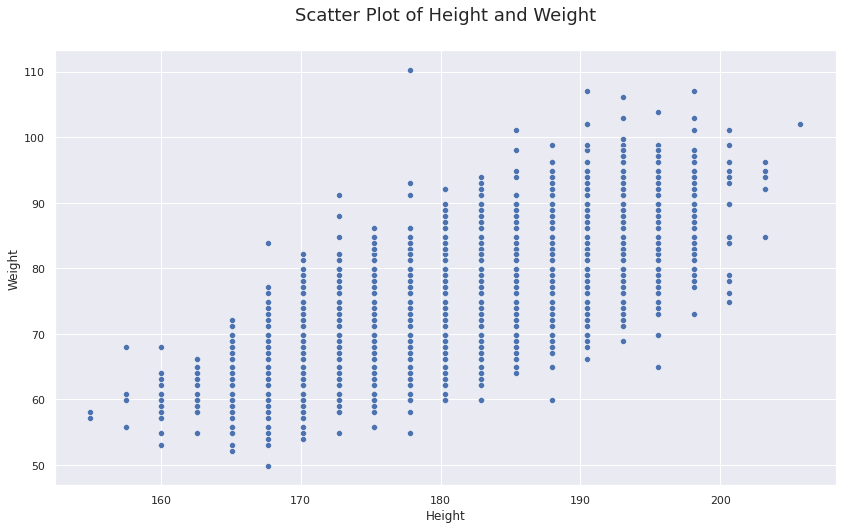

In [25]:
# Scatter Plot for Bi-Variate analysis of Height and Weight

sns.scatterplot(x=ps1_data.Height, y=ps1_data.Weight)
plt.title("Scatter Plot of Height and Weight", loc='center', size=18, pad=30)
plt.show()

* Looking at the plot above, we can say that most of the data points are lying in a linear fashion and there are few points which are far from the population like towards the extreme top.
* There is a strong positive correlation between Height and Weight attributes.

**Outliers detection using IQR range**

In [26]:
Q1 = ps1_data[["Height","Weight"]].quantile(0.25)
Q3 = ps1_data[["Height","Weight"]].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Height    10.160000
Weight     9.979135
dtype: float64


In [27]:
df_ht_wt=((ps1_data[["Height","Weight"]] < (Q1 - (1.5 * IQR))) | ((ps1_data[["Height","Weight"]] > (Q3 + (1.5 * IQR))) ) )

In [28]:
df_ht_wt.value_counts()

Height  Weight
False   False     16590
        True         61
True    False        27
        True          6
dtype: int64

* The data point where we have False that means these values are valid whereas True indicates presence of an outlier.
* As such, there are 7 players whose height and weight both are considered as outliers
* There are 68 players whose Weight is considered as outlier but not their Height


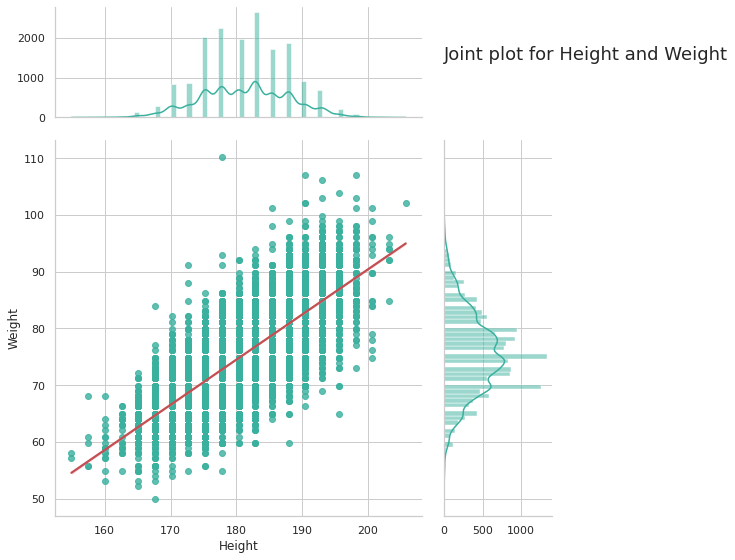

In [29]:
#Joint plot for Height and Weight

sns.set_theme(style="whitegrid")
sns.jointplot(data=ps1_data, x="Height", y="Weight", color="#3ab09e", marginal_ticks=True, kind="reg", height=8, ratio=3, joint_kws={'line_kws':{'color':'r'}})
plt.title("Joint plot for Height and Weight", loc='left', size=18, pad=80)
plt.show()

* With the regression line plotted in the scatter plot, we can see that there is a string positive correlation between Height and Weight i.e., when Height increases weight also increases 


**1.** **Summarise your findings from the visual**
   
   * From the above visualizations, we can say that most of the data points are lying in a linear fashion and there are few points which are far from the population like towards the extreme top.
   * There is a strong positive correlation between Height and Weight attributes.

**2. The reason for selecting the chart type you did**

  * Scatter plot gives the relationship between two numeric variables. The dots in a scatter plot not only reports the values of individual data points, but also patterns when the data is taken as a whole.
  * As we want to identify the relationship and other patterns between two numeric variables, scatter plot is used.

**3. Mention the pre-attentive attributes used.(atleast 2)**
  
  * A grid plot is used to plot the scatter points of the data hence grabbing the eye points focus towards the data points.
  * A regression line coloured in red is plotted to make it easy for the audience to understand the relation between the attributes.
  * Outliers are coloured in light colour and in the area where majority of the points are concentrated are darker in colour.
  
**4. Mention the gestalt principles used.(atleast 2)**

  * Principle of Continuity

  Outliers are in a continuous line and compel the eye to move through one object and continue to another object.

  * Principle of Similarity

  All the data points are represented by same shape, size and colour.

### Question 3
<h4>What kind of co-relation exists between Age and Overall
<br><br>    
Write the python code in the below cell to create appropriate visual to perform the above task.
<h4> Answer in markdown cells below the visual
<br><br>
<ol>
    <li>Summarise your findings from the visual</li>
    <li>The reason for selecting the chart type you did</li>
    <li>Mention the pre-attentive attributes used.(atleast 2)</li>
    <li>Mention the gestalt principles used.(atleast 2)</li>
</ol>

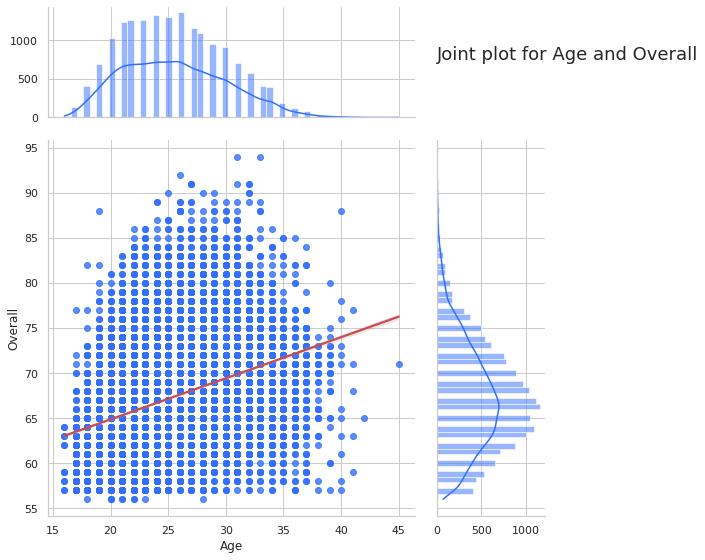

In [30]:
#Jointplot for Age and Overall

sns.jointplot(data=ps1_data, x="Age", y="Overall", marginal_ticks=True, color="#326ffd", kind="reg", height=8, ratio=3, joint_kws={'line_kws':{'color':'r'}})
plt.title("Joint plot for Age and Overall", loc='left', size=18, pad=80)
plt.show()

* Looking at the plot above, we can say that most of the data points are concentrated in the center towards left but there are points which are far from the population like towards the right curvature.
* There is a weak positive correlation between Age and Overall attributes.


**1.** **Summarise your findings from the visual**
   
   * From the above visualizations, we can say that most of the data points are lying in a somewhat but not exact linear fashion and there are many points which are far from the population like towards the top and bottom.
   * There is a weak positive correlation between Age and Overall hence leading to large error value.

**2. The reason for selecting the chart type you did**

  * The dots in a scatter plot not only reports the values of individual data points, but also patterns when the data is taken as a whole.
  * As we want to identify the relationship and other patterns between two numeric variables, scatter plot is used.

**3. Mention the pre-attentive attributes used.(atleast 2)**
  
  * A grid plot is used to plot the scatter points of the data hence grabbing the eye points focus towards the data points.
  * A regression line coloured in red is plotted to make it easy for the audience to understand the relation between the attributes.
  * Outliers are coloured in light colour and in the area where majority of the points are concentrated are darker in colour.
  
**4. Mention the gestalt principles used.(atleast 2)**

  * Principle of Continuity

  Outliers are in a continuous line and compel the eye to move through one object and continue to another object.

  * Principle of Similarity

  All the data points are represented by same shape, size and colour.

  ### Question 4
<h4>What kind of relation exists between Age and (potential vs Overall). Create an appropriate visual to compare potential vs Overall with respect to age in one single visual.
<br><br>
Write the python code in the below cell to create appropriate visual to perform the above task.
<h4> Answer in markdown cells below the visual
<br><br>
<ol>
    <li>Summarise your findings from the visual</li>
    <li>The reason for selecting the chart type you did</li>
    <li>Mention the pre-attentive attributes used.(atleast 2)</li>
    <li>Mention the gestalt principles used.(atleast 2)</li>
</ol>

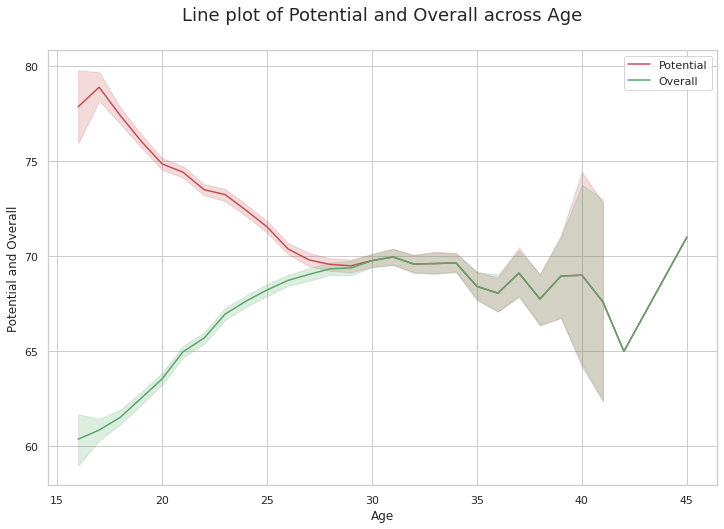

In [31]:
# Line plot of Potential and Overall across Age

plt.figure(figsize=(12, 8))
sns.lineplot(data=ps1_data, x="Age", y="Potential", legend="full", color='r', label="Potential")
sns.lineplot(data=ps1_data, x="Age", y="Overall", color="g", label="Overall")
plt.ylabel("Potential and Overall")
plt.title("Line plot of Potential and Overall across Age", loc='center', size=18, pad=30)
plt.legend()
plt.show()

In [32]:
ps1_data["Potential"].dtypes

dtype('int64')

Bucketizing Age attribute to colour code the scatter plot of Potential vs Overall

In [33]:
bins = [0, 18, 29, 39, 49, 59]
labels = [1, 2, 3, 4, 5]
label_names=["0-18 yrs", "19-29 yrs", "30-39 yrs", "40-49 yrs", "50+ yrs"]
ps1_data['agerange'] = pd.cut(ps1_data.Age, bins, labels = labels,include_lowest = True)

In [34]:
ps1_data[["Age","agerange"]].dtypes

Age            int64
agerange    category
dtype: object

**Alternative visual to compare Potential vs Overall with respect to Age**

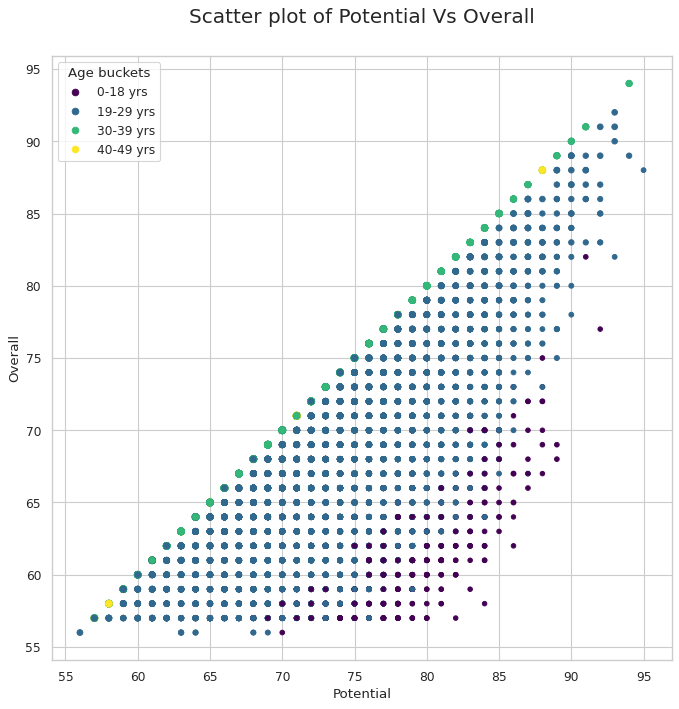

In [35]:
# Scatter plot of Potential Vs Overall coloured with agerange category as colour

plt.figure(figsize=(10, 10), dpi=80)
scatter = plt.scatter(ps1_data.Potential, ps1_data.Overall, ps1_data.Age, c=ps1_data.agerange, cmap='viridis', linewidth=0.8)
plt.legend(handles=scatter.legend_elements()[0], 
           labels=label_names,
           title="Age buckets")
plt.xlabel("Potential")
plt.ylabel("Overall")
plt.title("Scatter plot of Potential Vs Overall", loc='center', size=18, pad=30)
plt.show()


**1.** **Summarise your findings from the visual**
   
   * From the first visual it is evident that there is a huge difference between Potential and Overall of the players whose Age is below 30 years and tend to converge towards each other.
   * After that age there is not much difference in these 2 attributes but a sudden dip is seen at the age of 41 years.
   * From the above visualization, there is a strong correlation between Age and Potential Vs Overall as the Age buckets which are colour coded are distributed in a linear fashion.

**2. The reason for selecting the chart type you did**

  * The dots in a scatter plot not only reports the values of individual data points, but also patterns when the data is taken as a whole.
  * As we want to identify the relationship and other patterns between two numeric variables and the Age which is also numerical which is later converted to category by bucketizing the ages, a scatter plot is used.
  * To analyze the variation of Potential Vs Overall and Age we have plotted a line plot to understand the rise and fall in these attributes across Age. 

**3. Mention the pre-attentive attributes used.(atleast 2)**
  
  * In the scatter plot, age ranges are coloured so as to differentiate the groups and legend is given to indicate them.
  * In the line plot, Potential and Overall are represented by different colours so as to indicate that they are lines of different attributes.
  * The background of these two attributes are lightly shaded to represent the variation of that attribute for that particular Age along x-axis.
  
**4. Mention the gestalt principles used.(atleast 2)**

  * Principle of Similarity

  All the data points are represented by same shape, size and coloured with different colours to represent that they belong to different groups in scatter plot.

  * Principle of Figure/ ground

  We can differentiate the line of the attribute from its surrounding area in line plot by using lighter shade for background in line plot.  

  * Principle of Enclosure

  To represent the legend, a box is drawn surrounding the label names.


  ### Question 5
<h4>What kind of relation exists between Player Vision and Player Value. Create an appropriate visual to show any kind of relation that exists between Vision and Value of the player in one single visual.
<br><br>
Write the python code in the below cell to create appropriate visual to perform the above task.
<h4> Answer in markdown cells below the visual
<br><br>
<ol>
    <li>Summarise your findings from the visual</li>
    <li>The reason for selecting the chart type you did</li>
    <li>Mention the pre-attentive attributes used.(atleast 2)</li>
    <li>Mention the gestalt principles used.(atleast 2)</li>
</ol>

In [36]:
ps1_data.Vision.unique()

array([94.        , 82.        , 87.        , 68.        , 89.        ,
       92.        , 84.        , 63.        , 70.        , 77.        ,
       86.        , 52.        , 79.        , 80.        , 83.        ,
       69.        , 44.        , 50.        , 91.        , 90.        ,
       30.        , 74.        , 72.        , 41.        , 58.        ,
       64.        , 43.        , 76.        , 65.        , 62.        ,
       67.        , 59.        , 85.        , 56.        , 88.        ,
       47.        , 75.        , 93.        , 57.        , 81.        ,
       66.        , 22.        , 53.        , 78.        , 48.        ,
       49.        , 27.        , 73.        , 51.        , 54.        ,
       46.        , 45.        , 42.        , 60.        , 61.        ,
       71.        , 55.        , 23.        , 37.        , 25.        ,
       40.        , 34.        , 32.        , 36.        , 28.        ,
       15.        , 38.        , 33.        , 39.        , 31.  

In [37]:
ps1_data.Value.unique()

array([1.105e+08, 7.700e+07, 1.185e+08, 7.200e+07, 1.020e+08, 9.300e+07,
       6.700e+07, 8.000e+07, 5.100e+07, 6.800e+07, 7.650e+07, 4.400e+07,
       6.000e+07, 6.300e+07, 8.900e+07, 8.350e+07, 7.800e+07, 5.800e+07,
       5.350e+07, 5.150e+07, 3.800e+07, 6.450e+07, 2.700e+07, 8.100e+07,
       6.950e+07, 5.950e+07, 6.200e+07, 7.350e+07, 5.900e+07, 4.600e+07,
       4.300e+07, 3.600e+07, 5.700e+07, 2.400e+07, 3.000e+07, 4.000e+06,
       6.400e+07, 3.050e+07, 6.250e+07, 5.200e+07, 4.500e+07, 3.400e+07,
       4.650e+07, 6.100e+07, 4.150e+07, 4.450e+07, 5.650e+07, 5.300e+07,
       5.000e+07, 5.500e+07, 3.650e+07, 4.550e+07, 4.350e+07, 3.500e+07,
       3.900e+07, 1.800e+07, 2.150e+07, 5.050e+07, 5.400e+07, 4.050e+07,
       3.750e+07, 2.850e+07, 3.700e+07, 3.200e+07, 2.600e+07, 3.300e+07,
       3.850e+07, 3.550e+07, 9.000e+06, 1.550e+07, 2.200e+07, 1.400e+07,
       4.250e+07, 3.150e+07, 4.200e+07, 2.500e+07, 2.950e+07, 3.100e+07,
       2.450e+07, 2.750e+07, 2.900e+07, 1.650e+07, 

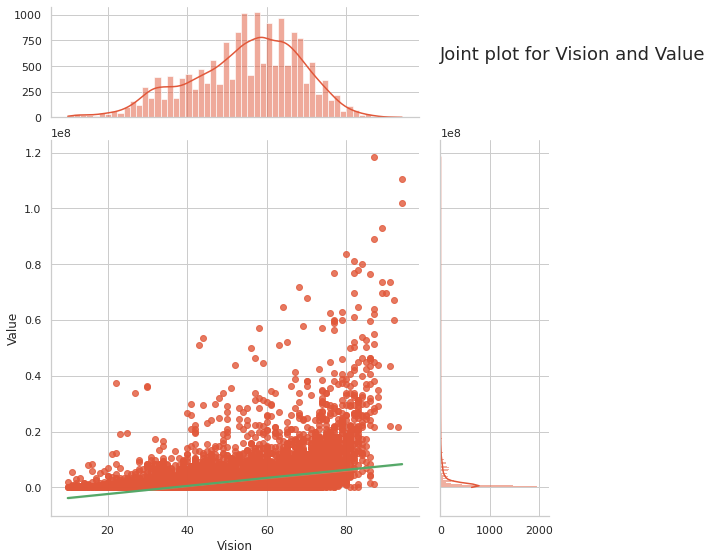

In [38]:
# Joint plot of Vision and Value

sns.jointplot(data=ps1_data, x="Vision", y="Value", marginal_ticks=True, color="#E15739", kind="reg", height=8, ratio=3, joint_kws={'line_kws':{'color':'g'}})
plt.title("Joint plot for Vision and Value", loc='left', size=18, pad=80)
plt.show()

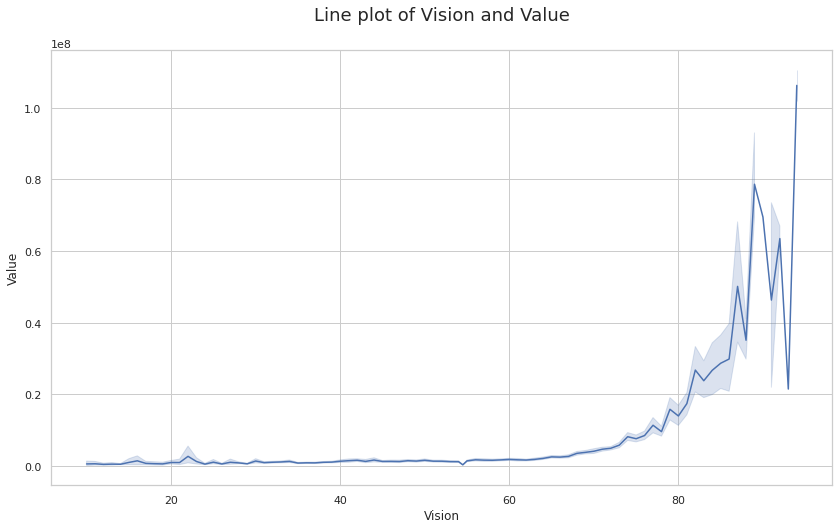

In [39]:
# Line plot of Vision and Value

sns.lineplot(data=ps1_data,x="Vision",y="Value")
plt.title("Line plot of Vision and Value", loc='center', size=18, pad=30)
plt.show()


**1.** **Summarise your findings from the visual**
   
  * Looking at the plot above, we can say that most of the data points are lying at the bottom and there are many data points that are far from the population.
  * There is a very weak positive correlation between Value and Vision attributes.
  * So as Vision increases, Value tends to vary very slowly.

**2. The reason for selecting the chart type you did**

  * The dots in a scatter plot not only reports the values of individual data points, but also patterns when the data is taken as a whole.
  * As we want to identify the relationship and other patterns between two numeric variables a scatter plot is used.
  * To analyze the variation of Vision and Value we have plotted a line plot to understand the rise and fall in these attributes.

**3. Mention the pre-attentive attributes used.(atleast 2)**
  
  * A grid plot is used to plot the scatter points of the data hence grabbing the eye points focus towards the data points.
  * A regression line coloured in green in previous scatter plot is plotted to make it easy for the audience to understand the relation between the attributes.
  * In scatter plot, outliers are coloured in light colour and in the area where majority of the points are concentrated are darker in colour.
  * In line plot, background of attribute "Value" is lightly shaded to represent the variation of that attribute for that particular "Vision" along x-axis.

**4. Mention the gestalt principles used.(atleast 2)**

  * Principle of Proximity

  Looking at the scatter plot above, we tend to group data points that seem near each other at bottom assume they share similar characteristics.

  * Principle of Continuity

  In the above plot, data points are aligned with one another to appear to form a continuation of one another.

  * Principle of Similarity

  All the data points are represented by same shape, size and color

# Group's choice-2 Marks
 
#### Frame 1 (more) question which will help in the EDA(Exploratory Data Analysis) of the given data set and answer the same using the best visual.
 
 1. Write the question in a markdown cell
 2. Below the question,in a coding cell,write the python code to create the visual to answer the question  

<h4> Answer in markdown cells below the visual <br><br>
   1.Summarise your findings from the visual.<br>
   2.The reason for selecting the chart type you did <br>
   3.Mention the pre-attentive attributes used.(atleast 2)<br>
   4.Mention the gestalt principles used.(atleast 2)<br>

## 1. What is the correlation between all the features in the dataset?

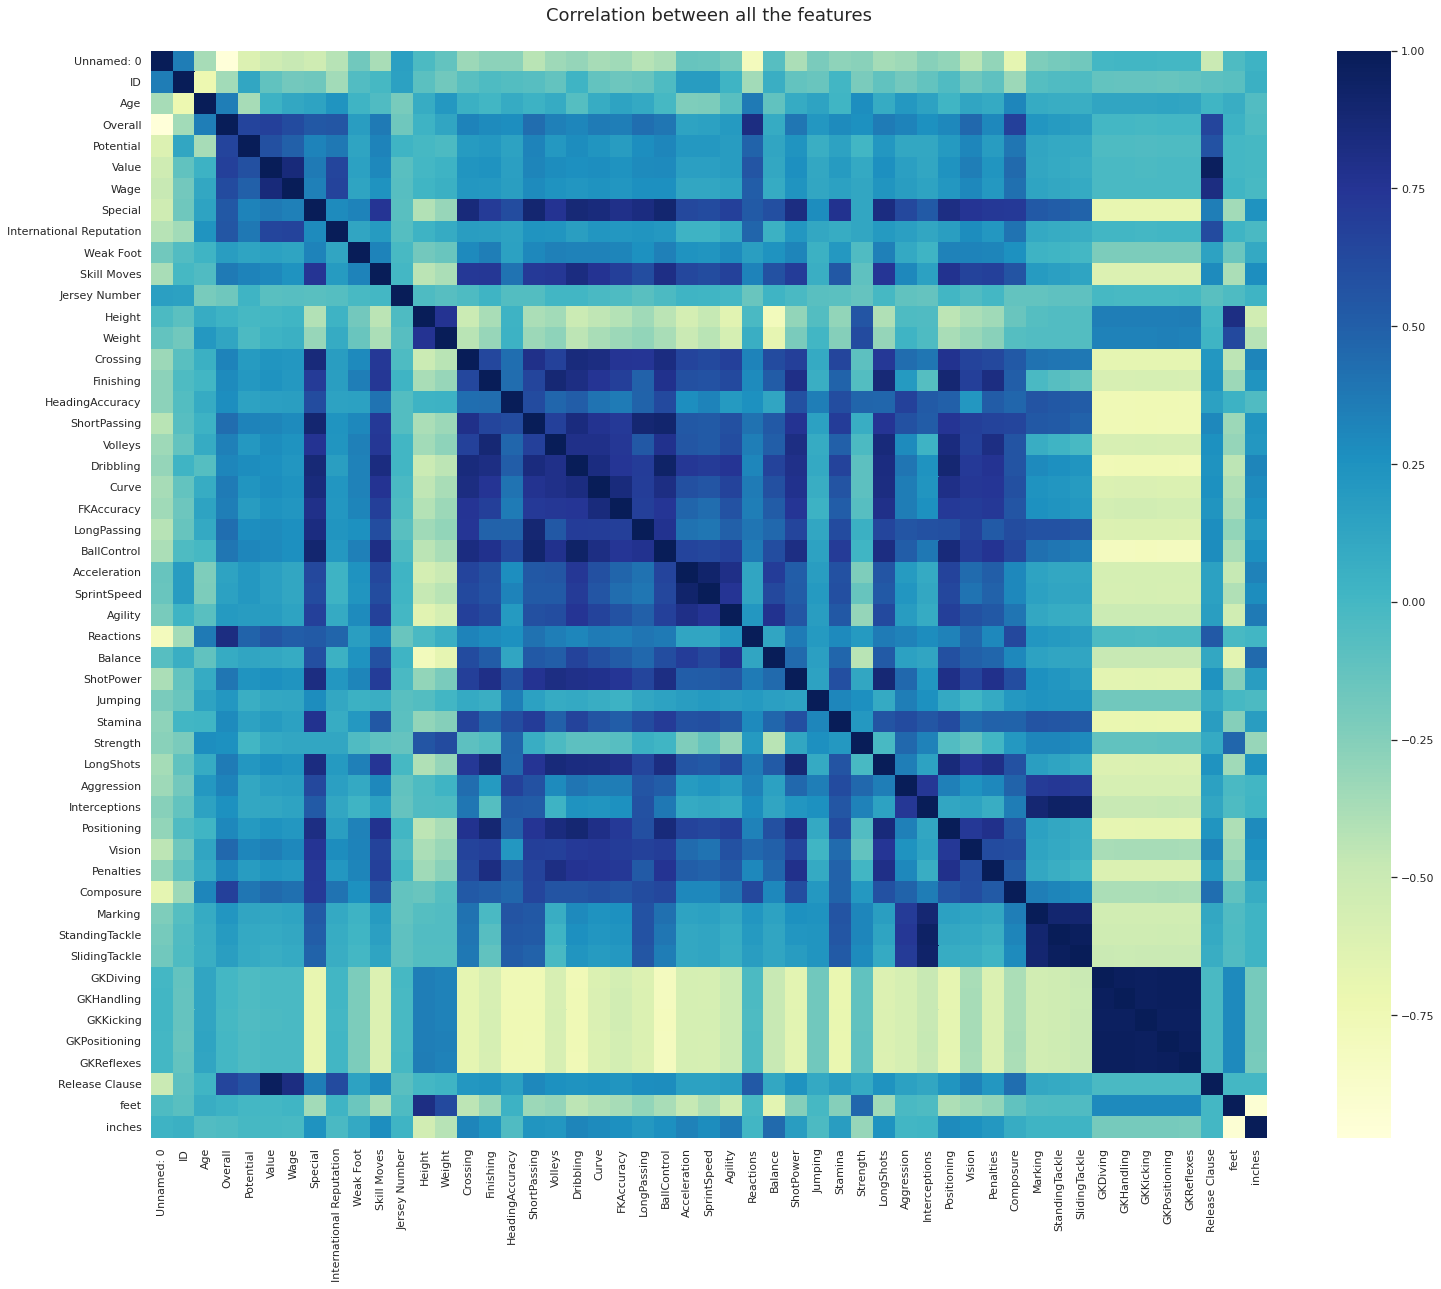

In [40]:
# Correlation heatmap
sns.set(rc = {'figure.figsize':(25,20)})
dataplot = sns.heatmap(ps1_data.corr(), cmap="YlGnBu")
plt.title("Correlation between all the features", loc='center', size=18, pad=30)
plt.show()


**1. Summarise your findings from the visual**

  * From the correlation heatmap, we can see that Value and Release Clause are highly correlated.
  * Next highly correlated attributes are GKDiving, GKHandling, GKKicking, GKPositioning, GKReflexes.

**2. The reason for selecting the chart type you did**

  * Inorder to analyse the correlation of the whole dataset, correlation heatmap is the best way which depicts high or low correlation by intensity of colours.

**3. Mention the pre-attentive attributes used.(atleast 2)**
  
  * Dark colour is used to represent that there is a high correlation between the variables and light colour to represent low correlation.

  * A gradient scale is used to show the amount of correlation among the attributes.

**4. Mention the gestalt principles used.(atleast 2)**

  * Principle of Similarity

  The plot across all the variables which have very high correlation are represented visually with dark colour, and the ones with low correlation with light colour on a gradient scale.

  * Principle of Continuity

  Our tendency to see shapes as continuous to the greatest degree possible. The human eye follows a sequence of coloured shapes to create pathways.

  * Principle of Focal Point

  Highlighting the cell which is having good correlation.


## 2. Which foot do the Footballers prefer?

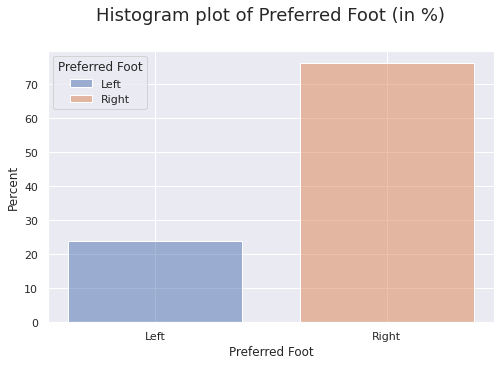

In [41]:
sns.set(rc = {'figure.figsize':(8,5)})
sns.histplot(data=ps1_data, x="Preferred Foot", hue="Preferred Foot", stat="percent", shrink=.75)
plt.title("Histogram plot of Preferred Foot (in %)", loc='center', size=18, pad=30)
plt.show()


**1. Summarise your findings from the visual**

  * From the above histogram plot, it is observed that more than 70% of teh players prefer right foot where as less than 25% of the players prefer left foot for playing. 

**2. The reason for selecting the chart type you did**

  * Inorder to compare the occurrence or count of a category, histogram plot is the best visual for representation.

**3. Mention the pre-attentive attributes used.(atleast 2)**
  
  * Two different colours are used to represent the two categories of Preferred Foot.

  * A gap is maintained between the two bars to differentiate  the categories.

**4. Mention the gestalt principles used.(atleast 2)**

  * Principle of Closure

  Inspite of the absence of border for the plot, the audience brain is inclined to perceive that the figure is complete.

  * Principle of Enclosure

  To represent the legend, a box is drawn surrounding the label names.


## 3. What is the distribution of International Reputation of players from different countries?

In [42]:
import plotly.graph_objs as go
import plotly.offline as py

rating = pd.DataFrame(ps1_data.groupby(['Nationality'])['Potential'].mean().reset_index())
count_df = pd.DataFrame(rating.groupby('Nationality')['Potential'].mean().reset_index())

trace = [go.Choropleth(
            colorscale = 'YlOrRd',
            locationmode = 'country names',
            locations = count_df['Nationality'],
            text = count_df['Nationality'],
            z = count_df['Potential'] )]

layout = go.Layout(title = 'Country vs Mean of Potential', title_x=0.5)

fig = go.Figure(data = trace, layout = layout)
py.iplot(fig)


**1. Summarise your findings from the visual**

  * From the chloropleth visual above, we can see that United Arab Emirates is having the highest average of Overall.

**2. The reason for selecting the chart type you did**

  * Inorder to represent statistical data through various shading patterns of Player's Overall, we have used chloropleth map.
  
**3. Mention the pre-attentive attributes used.(atleast 2)**
  
  * Only the regions that have players are coloured and rest are left as it is.

  * We have used a gradient scale to represent the shades of colours based on the mean of Overall attribute values.

**4. Mention the gestalt principles used.(atleast 2)**

  * Principle of Similarity

  The plot across all the variables which have very high average Ovaerall value are represented visually with dark colour, and the ones with lower average Overall value with light colour on a gradient scale.

  * Principle of Figure and Ground

  The coloured regions that form the figure in the chart, they are in the forefront and capture our attention.


<h1><center> ************ END OF ASSIGNMENT ****************</center></h1>